In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import svm
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB

In [2]:
from collections import Counter

In [3]:
df = pd.read_csv('IMDB.csv')
df=df.sample(frac=0.1 ,random_state=10)

In [4]:
df.dropna(inplace=True)

In [5]:
df['rating'] = np.where(df['sentiment']=="positive",1,0)
df

,review,sentiment,rating
27632,"This is one of the very, very few films that a...",positive,1
36119,"Fred ""The Hammer"" Williamson delivers another ...",negative,0
4796,"When the trailer for Accepted first came up, m...",positive,1
3648,Buddy is an entertaining family film set in a ...,positive,1
24501,I thought the kids in the movie were great. I ...,positive,1
...,...,...,...
40551,There are some comments about this film that s...,positive,1
40357,Tiempo de valientes is a very fun action comed...,positive,1
17041,The only reason i didn't delete this movie aft...,negative,0
23480,I don't think I've yet seen a movie in my whol...,positive,1


In [6]:
count=Counter(" ".join(df['review']).split()).most_common(50)

In [7]:
#most frequent word used used in Reviews
y=[w[0] for w in count if len(w[0])>3 ]
x=[w[1] for w in count if len(w[0])>3 ]
kf={'x':x,'y':y}


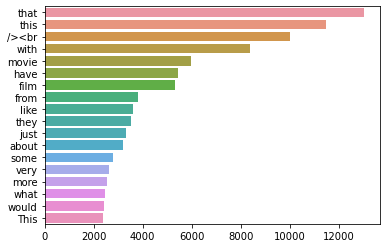

<Figure size 432x288 with 0 Axes>

In [8]:
sns.set_color_codes("pastel")
sns.barplot(x="x",y="y",data=kf)
plt.show()
plt.tight_layout()

In [9]:
#How many out of total movies are positively rated
df['rating'].mean()

0.495

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(df['review'],df['rating'],test_size=0.3)

In [11]:
len(X_test)

1500

In [12]:
vect = CountVectorizer().fit(X_train)

In [13]:
vect.get_feature_names()[::2000]

['00',
 'asses',
 'brims',
 'commenting',
 'deprecating',
 'entendres',
 'funny',
 'hitchcock',
 'johnson',
 'maguire',
 'nasa',
 'petit',
 'rebels',
 'screened',
 'ssg',
 'titillating',
 'voiceless']

In [14]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<3500x33331 sparse matrix of type '<class 'numpy.int64'>'
	with 475255 stored elements in Compressed Sparse Row format>

In [15]:
model = svm.SVC(kernel='linear')
grid_value = {'C':[0.001,0.01,0.05,0.1,1,5,10,50,100]}
clf = GridSearchCV(model,param_grid=grid_value,scoring='accuracy')
clf.fit(X_train_vectorized,Y_train)
print('best accuracy',clf.best_score_)
print('best parameter',clf.best_params_)


best accuracy 0.8571428571428571
best parameter {'C': 0.01}


In [17]:
model =  LogisticRegression()
grid_value = {'max_iter':[1000,1500,2000,2500,3000,3500,4000,4500,5000]}
clf = GridSearchCV(model,param_grid=grid_value,scoring='accuracy')
clf.fit(X_train_vectorized,Y_train)
print('best accuracy',clf.best_score_)
print('best parameter',clf.best_params_)


best accuracy 0.8508571428571428
best parameter {'max_iter': 1000}


In [18]:
model =  LogisticRegression(max_iter=1000)
accuracy_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='accuracy')
roc_auc_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='roc_auc')
recall_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='recall')

In [19]:
model = svm.SVC(kernel='linear',C=0.01)
x= [1,2,3,4,5,6,7,8,9,10]
accuracy_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='accuracy')
roc_auc_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='roc_auc')
recall_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='recall')

In [20]:
model = MultinomialNB()
x= [1,2,3,4,5,6,7,8,9,10]
accuracy_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='accuracy')
roc_auc_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='roc_auc')
recall_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='recall')


In [21]:
model = svm.SVC(kernel='rbf',C=0.01)
accuracy_rbf=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='accuracy')
roc_auc_rbf=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='roc_auc')
recall_rbf=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='recall')


In [22]:
data ={'accuracy_reg':accuracy_reg,'roc_auc_reg':roc_auc_reg,'recall_reg':recall_reg,
      'accuracy_svm':accuracy_svm,'roc_auc_svm':roc_auc_svm,'recall_svm':recall_svm,
      'accuracy_nb':accuracy_nb,'roc_auc_nb':roc_auc_nb,'recall_nb':recall_nb,
       'accuracy_rbf':accuracy_rbf,'roc_auc_rbf':roc_auc_rbf,'recall_rbf':recall_rbf,
      'x':x}
kdf = pd.DataFrame(data)

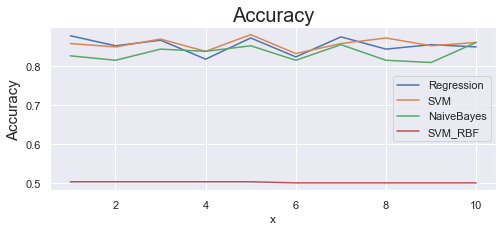

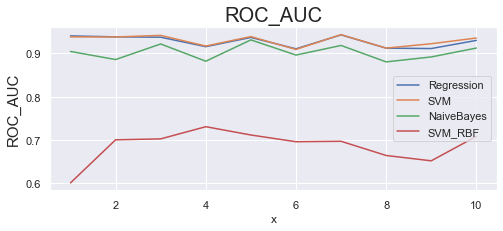

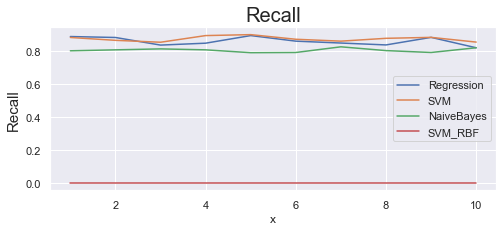

In [23]:
plt.figure(figsize = (8,3))
sns.set(style='darkgrid',)  
 
sns.lineplot(x = "x", y = "accuracy_reg", data = kdf)
sns.lineplot(x = "x", y = "accuracy_svm", data = kdf)
sns.lineplot(x = "x", y = "accuracy_nb", data = kdf)
sns.lineplot(x = "x", y = "accuracy_rbf", data = kdf)
plt.legend(labels=["Regression","SVM","NaiveBayes","SVM_RBF"])
plt.title("Accuracy", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 15)
plt.figure(figsize = (8,3)) 
sns.set(style='darkgrid',)
sns.lineplot(x = "x", y = "roc_auc_reg", data = kdf)
sns.lineplot(x = "x", y = "roc_auc_svm", data = kdf)
sns.lineplot(x = "x", y = "roc_auc_nb", data = kdf)
sns.lineplot(x = "x", y = "roc_auc_rbf", data = kdf)
plt.title("ROC_AUC", fontsize = 20)
plt.ylabel("ROC_AUC", fontsize = 15)
plt.legend(labels=["Regression","SVM","NaiveBayes","SVM_RBF"])
plt.figure(figsize = (8,3)) 
sns.set(style='darkgrid',)
sns.lineplot(x = "x", y = "recall_reg", data = kdf)
sns.lineplot(x = "x", y = "recall_svm", data = kdf)
sns.lineplot(x = "x", y = "recall_nb", data = kdf)
sns.lineplot(x = "x", y = "recall_rbf", data = kdf)
plt.title("Recall", fontsize = 20)
plt.ylabel("Recall", fontsize = 15)
plt.legend(labels=["Regression","SVM","NaiveBayes","SVM_RBF"])

In [25]:
model = svm.SVC(kernel='linear',C=0.01)
model.fit(X_train_vectorized,Y_train)
predictions=model.predict(vect.transform(X_test))


In [26]:
print("Accuracy ",accuracy_score(Y_test,predictions))
print("roc-auc",roc_auc_score(Y_test,predictions))

Accuracy  0.856
roc-auc 0.8561821739903931


In [28]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized,Y_train)
predictions=model.predict(vect.transform(X_test))

In [29]:
print("Accuracy ",accuracy_score(Y_test,predictions))
print("roc-auc",roc_auc_score(Y_test,predictions))

Accuracy  0.8486666666666667
roc-auc 0.848505603985056


In [30]:
print(model.predict(vect.transform(['Not horrible at all movie,An very Good movie '])))

[0]


In [31]:
print(model.predict(vect.transform(['No regret movie,An very Good movie '])))

[1]


In [71]:
feature_names = np.array(vect.get_feature_names())
sorted_index  = model.coef_[0].argsort()
print('Smallest Coefs :\n{}\n'.format(feature_names[sorted_index[:10]]))
print('Largest Coefs :\n{}\n'.format(feature_names[sorted_index[-11:-1]]))

Smallest Coefs :
['worst' 'awful' 'boring' 'terrible' 'worse' 'bad' 'nothing' 'instead'
 'waste' 'poor']

Largest Coefs :
['surprised' 'definitely' 'wonderful' 'dvd' 'enjoyable' 'highly' 'amazing'
 'perfect' 'enjoyed' 'loved']



# TFIDF

In [54]:
vect = TfidfVectorizer(min_df =5).fit(X_train)


In [55]:
X_train_vectorized = vect.transform(X_train)


In [56]:
model =  LogisticRegression()
grid_value = {'max_iter':[1000,1500,2000,2500,3000,3500,4000,4500,5000]}
clf = GridSearchCV(model,param_grid=grid_value,scoring='accuracy')
clf.fit(X_train_vectorized,Y_train)
print('best accuracy',clf.best_score_)
print('best parameter',clf.best_params_)

best accuracy 0.8511428571428571
best parameter {'max_iter': 1000}


In [57]:
model =  LogisticRegression(max_iter=1000)
accuracy_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='accuracy')
roc_auc_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='roc_auc')
recall_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='recall')

In [58]:
model = svm.SVC(kernel='linear',C=0.01)
x= [1,2,3,4,5,6,7,8,9,10]
accuracy_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='accuracy')
roc_auc_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='roc_auc')
recall_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='recall')

In [59]:
model = MultinomialNB()
x= [1,2,3,4,5,6,7,8,9,10]
accuracy_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='accuracy')
roc_auc_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='roc_auc')
recall_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='recall')


In [60]:
data ={'accuracy_reg':accuracy_reg,'roc_auc_reg':roc_auc_reg,'recall_reg':recall_reg,
      'accuracy_svm':accuracy_svm,'roc_auc_svm':roc_auc_svm,'recall_svm':recall_svm,
      'accuracy_nb':accuracy_nb,'roc_auc_nb':roc_auc_nb,'recall_nb':recall_nb,
      'x':x}
kdf = pd.DataFrame(data)


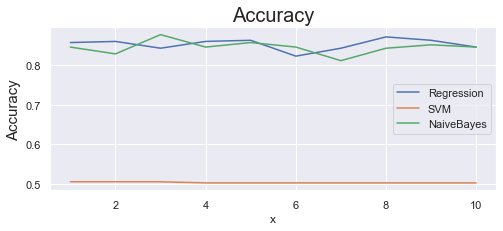

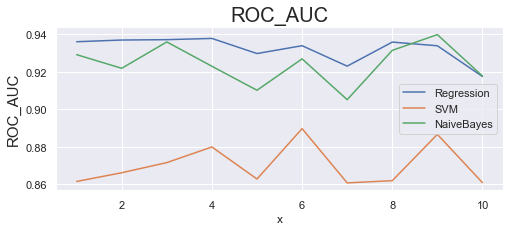

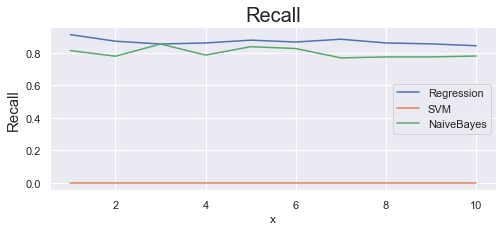

In [61]:
plt.figure(figsize = (8,3))
sns.set(style='darkgrid',)  
 
sns.lineplot(x = "x", y = "accuracy_reg", data = kdf)
sns.lineplot(x = "x", y = "accuracy_svm", data = kdf)
sns.lineplot(x = "x", y = "accuracy_nb", data = kdf)
plt.legend(labels=["Regression","SVM","NaiveBayes"])
plt.title("Accuracy", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 15)
plt.figure(figsize = (8,3)) 
sns.set(style='darkgrid',)
sns.lineplot(x = "x", y = "roc_auc_reg", data = kdf)
sns.lineplot(x = "x", y = "roc_auc_svm", data = kdf)
sns.lineplot(x = "x", y = "roc_auc_nb", data = kdf)
plt.title("ROC_AUC", fontsize = 20)
plt.ylabel("ROC_AUC", fontsize = 15)
plt.legend(labels=["Regression","SVM","NaiveBayes"])
plt.figure(figsize = (8,3)) 
sns.set(style='darkgrid',)
sns.lineplot(x = "x", y = "recall_reg", data = kdf)
sns.lineplot(x = "x", y = "recall_svm", data = kdf)
sns.lineplot(x = "x", y = "recall_nb", data = kdf)
plt.title("Recall", fontsize = 20)
plt.ylabel("Recall", fontsize = 15)
plt.legend(labels=["Regression","SVM","NaiveBayes"])

In [63]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized,Y_train)
predictions=model.predict(vect.transform(X_test))

In [64]:
print("Accuracy ",accuracy_score(Y_test,predictions))
print("roc-auc",roc_auc_score(Y_test,predictions))

Accuracy  0.8713333333333333
roc-auc 0.8716097987751532


In [65]:
feature_names = np.array(vect.get_feature_names())
sorted_index  = model.coef_[0].argsort()
print('Smallest TFIDF :\n{}\n'.format(feature_names[sorted_index[:10]]))
print('Largest Largest :\n{}\n'.format(feature_names[sorted_index[-11:-1]]))

Smallest TFIDF :
['bad' 'worst' 'no' 'awful' 'boring' 'waste' 'even' 'nothing' 'poor'
 'terrible']

Largest Largest :
['favorite' 'very' 'as' 'amazing' 'best' 'enjoyed' 'loved' 'love' 'and'
 'excellent']



In [66]:
print(model.predict(vect.transform(['An very Good movie '])))

[1]


In [70]:
print(model.predict(vect.transform(['Not horrible at all movie,An very Good movie '])))

[0]


In [68]:
print(model.predict(vect.transform(['Absolutely horrible movie '])))

[0]


# n-grams

In [72]:
vect = CountVectorizer(min_df=5,ngram_range=(1,2)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
len(vect.get_feature_names())

28240

In [18]:
model =  LogisticRegression()
grid_value = {'max_iter':[1000,1500,2000,2500,3000,3500,4000,4500,5000]}
clf = GridSearchCV(model,param_grid=grid_value,scoring='accuracy')
clf.fit(X_train_vectorized,Y_train)
print('best accuracy',clf.best_score_)
print('best parameter',clf.best_params_)

best accuracy 0.85
best parameter {'max_iter': 1000}


In [47]:
model =  LogisticRegression(max_iter=1000)
accuracy_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='accuracy')
roc_auc_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='roc_auc')
recall_reg=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='recall')

In [48]:
model = svm.SVC(kernel='linear',C=0.01)
x= [1,2,3,4,5,6,7,8,9,10]
accuracy_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='accuracy')
roc_auc_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='roc_auc')
recall_svm=cross_val_score(model,X_train_vectorized,Y_train,cv=10,scoring ='recall')


In [49]:
model = MultinomialNB()
x= [1,2,3,4,5,6,7,8,9,10]
accuracy_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='accuracy')
roc_auc_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='roc_auc')
recall_nb=cross_val_score(model,(X_train_vectorized).toarray(),Y_train,cv=10,scoring ='recall')


In [50]:
data ={'accuracy_reg':accuracy_reg,'roc_auc_reg':roc_auc_reg,'recall_reg':recall_reg,
      'accuracy_svm':accuracy_svm,'roc_auc_svm':roc_auc_svm,'recall_svm':recall_svm,
      'accuracy_nb':accuracy_nb,'roc_auc_nb':roc_auc_nb,'recall_nb':recall_nb,
      'x':x}
kdf = pd.DataFrame(data)


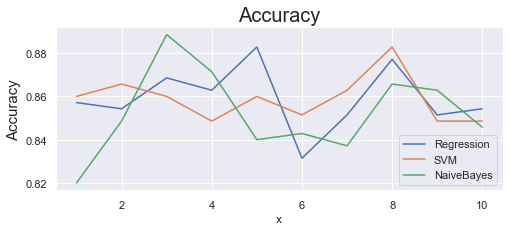

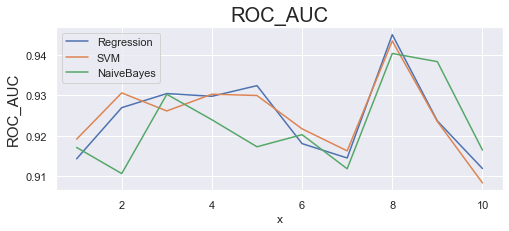

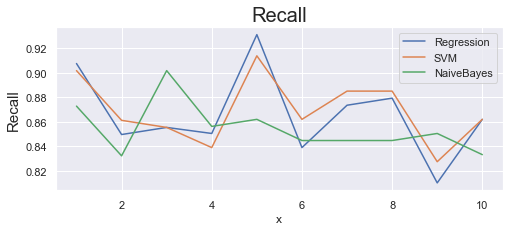

In [53]:
plt.figure(figsize = (8,3))
sns.set(style='darkgrid',)  
 
sns.lineplot(x = "x", y = "accuracy_reg", data = kdf)
sns.lineplot(x = "x", y = "accuracy_svm", data = kdf)
sns.lineplot(x = "x", y = "accuracy_nb", data = kdf)
plt.legend(labels=["Regression","SVM","NaiveBayes"])
plt.title("Accuracy", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 15)
plt.figure(figsize = (8,3)) 
sns.set(style='darkgrid',)
sns.lineplot(x = "x", y = "roc_auc_reg", data = kdf)
sns.lineplot(x = "x", y = "roc_auc_svm", data = kdf)
sns.lineplot(x = "x", y = "roc_auc_nb", data = kdf)
plt.title("ROC_AUC", fontsize = 20)
plt.ylabel("ROC_AUC", fontsize = 15)
plt.legend(labels=["Regression","SVM","NaiveBayes"])
plt.figure(figsize = (8,3)) 
sns.set(style='darkgrid',)
sns.lineplot(x = "x", y = "recall_reg", data = kdf)
sns.lineplot(x = "x", y = "recall_svm", data = kdf)
sns.lineplot(x = "x", y = "recall_nb", data = kdf)
plt.title("Recall", fontsize = 20)
plt.ylabel("Recall", fontsize = 15)
plt.legend(labels=["Regression","SVM","NaiveBayes"])

In [79]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized,Y_train)
predictions=model.predict(vect.transform(X_test))

In [80]:
print("Accuracy ",accuracy_score(Y_test,predictions))
print("roc-auc",roc_auc_score(Y_test,predictions))

Accuracy  0.8646666666666667
roc-auc 0.8646426818598895


In [81]:
print(model.predict(vect.transform(['Not horrible at all movie,An very Good movie '])))

[1]


In [82]:
print(model.predict(vect.transform(['No regret movie,An very Good movie '])))

[1]


In [84]:
print(model.predict(vect.transform(['regret movie,An very Bad movie '])))

[0]


In [42]:
feature_names = np.array(vect.get_feature_names())
sorted_index  = model.coef_[0].argsort()
print('Smallest n_gram :\n{}\n'.format(feature_names[sorted_index[:10]]))
print('Largest n_gram :\n{}\n'.format(feature_names[sorted_index[-11:-1]]))

Smallest n_gram :
['worst' 'boring' 'awful' 'bad' 'the worst' 'waste' 'horrible' 'worse'
 'poor' 'terrible']

Largest n_gram :
['today' 'dvd' 'perfect' 'favorite' 'wonderful' 'highly' 'great' 'amazing'
 'loved' 'enjoyed']

